In [35]:
import pandas as pd

tweets = pd.read_csv('./dataset/2022 Twitter Tweets Jan-April_Amber Heard Data.csv')
df = pd.DataFrame(tweets)

C:\Users\catharinaa.2019\AppData\Local\Temp\ipykernel_22316\2556000904.py:3: DtypeWarning: Columns (0,4,5,25,29,30,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv('./dataset/2022 Twitter Tweets Jan-April_Amber Heard Data.csv')


In [36]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [20]:
print(set(stopwords.words('english')))

{'haven', "haven't", 'had', 'he', 'now', 'during', 'am', 'before', 'doesn', 'hers', 'both', 'then', "won't", 'with', 'being', 'from', 'did', 'theirs', 'have', 'mustn', "it's", 'off', 'his', 'who', 'itself', 'than', 'their', 'weren', 'y', 'such', 'here', 'are', 'don', 'be', 'm', 'under', 'about', "that'll", 'yourself', 'himself', 'ain', 'it', 'ours', 'most', "you're", 'mightn', 'when', "hasn't", 'to', 'further', 'where', "she's", 'needn', "you'd", 'and', 'a', 'above', "didn't", 'some', 'same', 'its', 'can', "couldn't", 'i', 'on', 'that', 'those', 'were', 'having', "shan't", 'didn', 'an', 'until', 'over', 't', 'my', 'll', 'while', 'they', 'below', 'own', 'this', 'but', 'down', 'through', "needn't", 'should', 'as', 'after', 'our', 'him', 'aren', 'or', "you'll", 'ma', 'your', 'few', 'only', 'hasn', 'she', 'not', 'does', 'them', 'been', 'hadn', 's', 're', "mustn't", 'out', 'which', 'because', "weren't", 'just', 'in', 'all', 'shouldn', 'ourselves', 'between', "aren't", 'no', 'was', 'what', '

In [37]:
df2 = df[df["lang"] == "en"]
df2

,id_str,created_at,full_text,lang,in_reply_to_status_id_str,in_reply_to_user_id,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.friends_count,user.lang,user.location,user.name,user.screen_name,user.profile_banner_url,user.profile_image_url,user.statuses_count,user.url,user.verified
0,1477504983130116096.0,2022-01-02 05:00:13+00:00,@la77465262 @Melinda15199317 @Dior So why is #...,en,1466075642244603909,1363630915298148352.0,"[{'indices': [45, 56], 'text': 'JohnnyDepp'}]","[{'original_info': {'width': 1058, 'focus_rect...",[],[],...,1898.0,NaN,NaN,Sean O'Connor,seano999,https://pbs.twimg.com/profile_banners/11497951...,http://pbs.twimg.com/profile_images/1442389537...,27033.0,NaN,False
1,1477503751716065280.0,2022-01-02 04:55:19+00:00,Only thing I want them to leave alone is the f...,en,NaN,NaN,[],NaN,[],[],...,1025.0,NaN,NaN,❤️‍🔥 Wilson the Opp Slayer 🔪,WonderWilson18,https://pbs.twimg.com/profile_banners/14262271...,http://pbs.twimg.com/profile_images/1515742990...,27853.0,https://t.co/dVvgQNht1k,False
2,1477499814719983616.0,2022-01-02 04:39:41+00:00,@soldierboy43001 @ZakReckless Yeah but Snyder ...,en,1477497121972621318,1297204830231040000.0,[],NaN,[],[],...,139.0,NaN,NaN,Steven Curry,StevenJCurry,https://pbs.twimg.com/profile_banners/14273589...,http://pbs.twimg.com/profile_images/1429534379...,199.0,NaN,False
3,1477497740498292736.0,2022-01-02 04:31:26+00:00,@IIMissMax @bg98021 @GerberKawasaki You forgot...,en,1477475212992073728,305017078.0,[],NaN,[],[],...,128.0,NaN,NaN,Vincent 1,Vincent72516869,NaN,http://pbs.twimg.com/profile_images/1354614785...,2313.0,NaN,False
4,1477496477484212224.0,2022-01-02 04:26:25+00:00,I never seen Aquaman nor will I because Amber ...,en,NaN,NaN,[],NaN,[],[],...,141.0,NaN,𝗡𝗢𝗧 𝗦𝗣𝗢𝗜𝗟𝗘𝗥 𝗙𝗥𝗘𝗘,𝐇𝐘𝐃𝐄,YoonJaysSimp,https://pbs.twimg.com/profile_banners/10769432...,http://pbs.twimg.com/profile_images/1516751870...,5423.0,https://t.co/XkBVR5FDCS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508241,1515570192960659460,2022-04-17 05:57:46+00:00,"@GardenCole First of all, no I did not, though...",en,1515564278417305600.0,1492510921704415232.0,[],NaN,[],[],...,4790,NaN,United States,💛❤️💙🤍treystar679,treystar679,https://pbs.twimg.com/profile_banners/80660615...,http://pbs.twimg.com/profile_images/1500767367...,5831,https://t.co/QylPdKmQVk,False
508242,1515569901158600704,2022-04-17 05:56:37+00:00,Gender card pulled out. They are now spinning ...,en,NaN,NaN,[],NaN,[],[],...,201,NaN,NaN,ayyy nakoooo,GhelSandra,https://pbs.twimg.com/profile_banners/27013539...,http://pbs.twimg.com/profile_images/1402120521...,30280,https://t.co/KRDaAomcsU,False
508243,1515569890391961601,2022-04-17 05:56:34+00:00,Amber heard is a libra moon. Ive known a few l...,en,NaN,NaN,[],NaN,[],[],...,154,NaN,NaN,Jeli Bean,lilithrising_,https://pbs.twimg.com/profile_banners/14184202...,http://pbs.twimg.com/profile_images/1516523367...,7863,NaN,False
508245,1515569604818575368,2022-04-17 05:55:26+00:00,"Amber Heard is dating Eve Fartlow, Chelsea Man...",en,NaN,NaN,[],NaN,[],[],...,3214,NaN,"Rockford, Illinois",Jalopy Galopy,Jankem69420,https://pbs.twimg.com/profile_banners/13194711...,http://pbs.twimg.com/profile_images/1427306627...,9171,https://t.co/C6Pn7cxcss,False


In [38]:
# Let's retrieve just the text from each tweet
# Store each tweet text as a List item

tweet_text_list = df2['full_text'].tolist()

tweet_text_list

["@la77465262 @Melinda15199317 @Dior So why is #JohnnyDepp only bringing a civil case against Amber Heard? Because he knows his evidence won't stand up in criminal court! Johnny's just wasting his money! His reputation is shot. His own fault for bringing the case in UK. Even the stans say it's a waste of time! 😂 https://t.co/JcUseKVN0s",
 'Only thing I want them to leave alone is the first Wonder Woman movie. They need to completely redo phase 1 and also take Amber Heard out of future Aquaman films',
 "@soldierboy43001 @ZakReckless Yeah but Snyder isn't involved in the Flash so why would he care. Same with Amber Heard.",
 '@IIMissMax @bg98021 @GerberKawasaki You forgot he hook up with amber heard . I am sure he can find someone when he is stress out',
 'I never seen Aquaman nor will I because Amber Heard….',
 '@neutral_as_eff @TinseltownMayor @RSTSnyderVerse @jessika7979 Gonna go ahead and be charitable here to both of you, I think he meant Amber Heard and got the name wrong',
 'Excell

In [39]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [41]:
'''
Text Preprocessing: From Start to Finish

I hope you understand the steps I have explained above.
Now we can combine all those lines of code into one function that we can
call and pass an argument to.

The function then returns a clean text that is ready for you to work with.

Keep in mind that the order of steps here are not absolute.
You can arrange them around depending on your text and your needs.
The code below is what I found to be the most effective on the data I
usually work with, but in case you find another pattern of data,
you can always work them out differently.
'''
import numpy as np
import re

stop_words = set(stopwords.words('english'))
# lemmatizer = nltk.stem.WordNetLemmatizer()
# tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
#     temp = re.sub(r" s ","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = [lemmatizer.lemmatize(w) for w in temp]

#     temp = [(lemmatizer.lemmatize(w, tag_dict.get(nltk.pos_tag([w])[0][1][0].upper(), wordnet.NOUN))) for w in temp]
    
    temp = " ".join(word for word in temp)
    return temp

In [42]:
# Let's go and apply this to our own tweets
my_results = [clean_tweet(tw) for tw in tweet_text_list]
my_results

['bringing civil case know evidence wont stand criminal court wasting money reputation shot fault bringing case uk even stans say waste time',
 'thing want leave alone first wonder woman movie need completely redo phase 1 also take future aquaman film',
 'ye snyder isnt involved flash would care',
 'forgot hook sure find someone stress',
 'never seen aquaman',
 'gonna go ead charitable think meant got name wrong',
 'excellent fan art',
 'yes',
 'literally someone saying boycott aquaman 2 flash ezra miller besties anything come dc',
 'newest receipt courtesy thank jon',
 'see aquaman trending reminder abuser boycotting aquaman 2 come unless support abuser watch movie illegally must mutually abusive relationship relationship myth',
 'drop might see happen',
 'abusive housekeeper found deal',
 'mr joyce australian authority stop seeking attention back accept fact one smuggled dog committed perjury forced others lie thats charged two celebrity',
 'tryin forgive self goin ead switchin heat 

In [33]:
lemmatizer = nltk.stem.WordNetLemmatizer()
# tag_dict = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemm(tweet):
#     temp = tweet.split()
#     temp = [(lemmatizer.lemmatize(w, tag_dict.get(nltk.pos_tag([w])[0][1][0].upper(), wordnet.NOUN))) for w in temp]
    temp = []
    nltk_tagged = nltk.pos_tag(tweet.split())
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    
    for word, tag in wordnet_tagged:
        if tag is None:
            temp.append(word) 
        else: 
            temp.append(lemmatizer.lemmatize(word, tag))
    return temp

In [34]:

my_results2 = [lemm(tw) for tw in my_results]
my_results2

KeyboardInterrupt: 

In [38]:
test = clean_tweet(tweet_text_list[8])
test

'literally someone say boycott aquaman 2 flash ezra miller besties anything come dc'

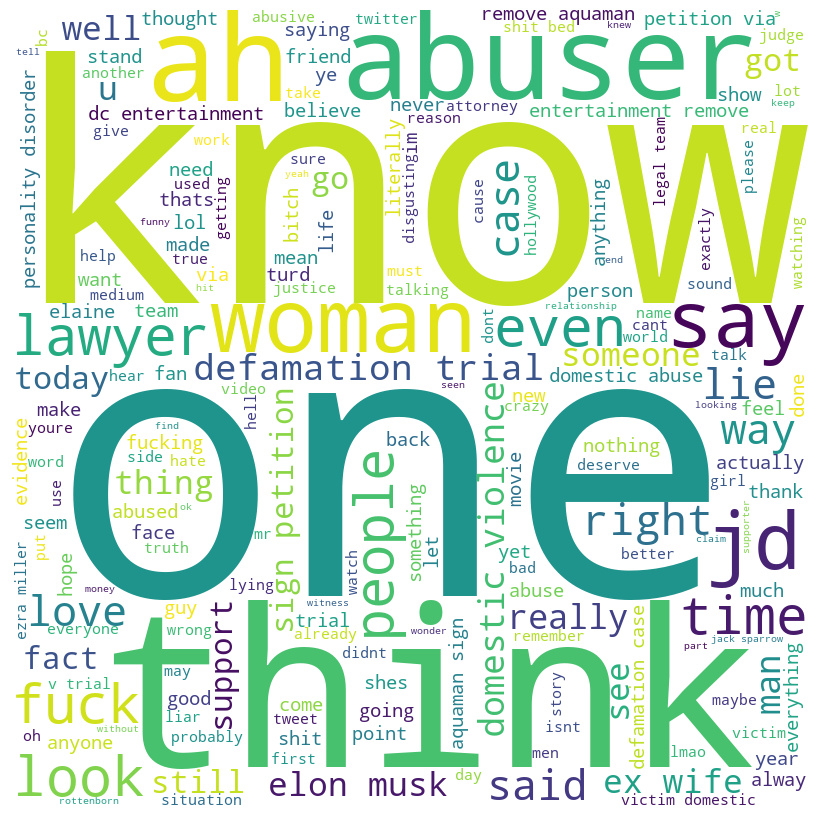

In [25]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

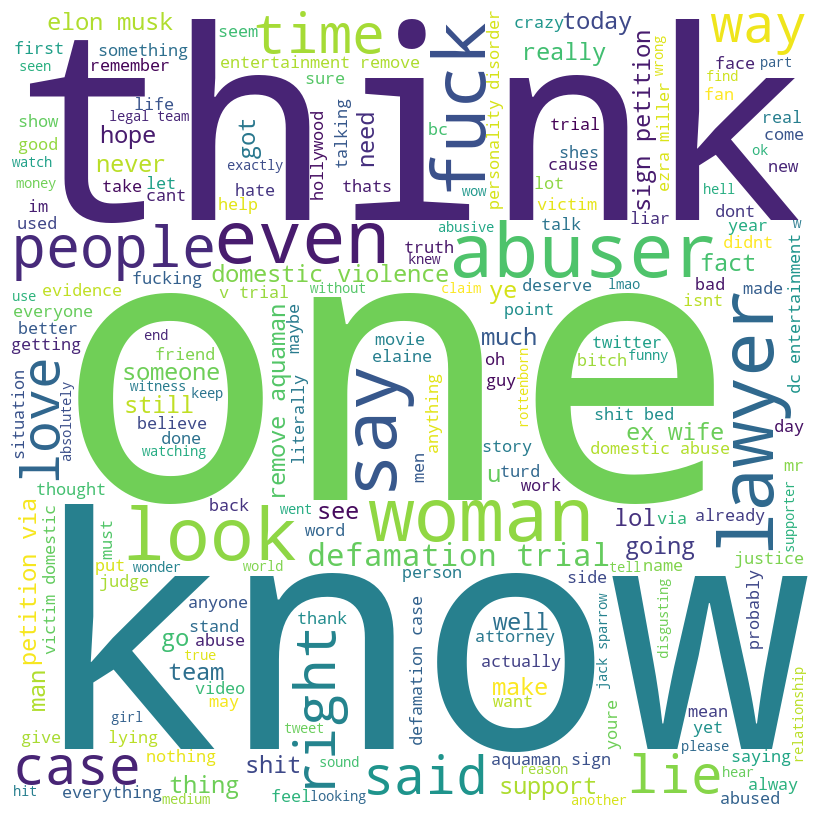

In [44]:
# importing all necessary modules

# Note that wordcloud package also provides a stop word list
# We won't be using it here - but please do explore!!!
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in my_results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()